# INFO 5613 – Class 07: Node-level metrics

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)

## Import libraries

In [1]:
# Load networkx for working with network data
import networkx as nx

# Load numpy for working with numerical data
import numpy as np

# Load pandas for working with tabular data
import pandas as pd

# Load visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sb

# Define a formatting string we can use to print the number of nodes and edges
node_edge_s = "There are {0:,} nodes and {1:,} edges in the network"

## Load and examine data

### polblogs data

In [2]:
# Load the file from disk and assign to the g variable
polblogs_g = nx.read_gml('polblogs_cleaned.gml')

In [3]:
# Print out the number of nodes and edges using the string from above
print(node_edge_s.format(polblogs_g.number_of_nodes(),polblogs_g.number_of_edges()))

There are 1,490 nodes and 19,025 edges in the network


In [4]:
# Inspect the first 5 nodes' meta-data
list(polblogs_g.nodes(data=True))[:5]

[('liberaloasis.com',
  {'value': 0, 'source': 'LeftyDirectory,LabeledManually,CampaignLine'}),
 ('hugozoom.blogspot.com', {'value': 0, 'source': 'Blogarama,LeftyDirectory'}),
 ('wholewheatblogger.com', {'value': 1, 'source': 'BlogCatalog'}),
 ('drudgereport.com', {'value': 1, 'source': 'LabeledManually'}),
 ('markarkleiman.com', {'value': 0, 'source': 'eTalkingHead'})]

In [5]:
# Inspect the first 5 edges' meta-data
list(polblogs_g.edges(data=True))[:5]

[('liberaloasis.com', 'hugozoom.blogspot.com', {'edge_type': '0-0'}),
 ('liberaloasis.com', 'reachm.com/amstreet', {'edge_type': '0-0'}),
 ('liberaloasis.com', 'americablog.blogspot.com', {'edge_type': '0-0'}),
 ('liberaloasis.com', 'offthekuff.com/mt', {'edge_type': '0-0'}),
 ('liberaloasis.com', 'yglesias.typepad.com/matthew', {'edge_type': '0-0'})]

### boulder_politics

In [6]:
boulder_g = nx.read_gexf('boulder_politics.gexf')

print(node_edge_s.format(boulder_g.number_of_nodes(),boulder_g.number_of_edges()))

There are 683 nodes and 63,697 edges in the network


In [7]:
# Inspect the first 5 nodes' meta-data
list(boulder_g.nodes(data=True))[:5]

[('1857870864',
  {'name': 'Aaron Brockett',
   'screen_name': 'AaronBrockett12',
   'location': 'Boulder, CO',
   'description': 'Parent, spouse, software developer. Member of the Boulder City Council since 2015. He/him/his. #BoulderStrong',
   'protected': False,
   'followers_count': 2235,
   'friends_count': 1464,
   'created_at': 2013,
   'verified': False,
   'statuses_count': 7289,
   'label': 'aaronbrockett12'}),
 ('59228446',
  {'name': 'Adam Fennel',
   'screen_name': 'adamfennel',
   'location': 'Boulder, CO',
   'description': 'Managing Director - Huron, Higher Education Practice; Higher Education Advocate and Dreamer (Tweets are my own)',
   'protected': False,
   'followers_count': 247,
   'friends_count': 718,
   'created_at': 2009,
   'verified': False,
   'statuses_count': 5286,
   'label': 'adamfennel'}),
 ('346924404',
  {'name': 'Leslie Barrett',
   'screen_name': 'ridicuLeslie',
   'location': 'Boulder, CO',
   'description': 'former child unlearning the ways of th

In [8]:
# Inspect the first 5 edges' meta-data
list(boulder_g.edges(data=True))[:5]

[('1857870864',
  '59228446',
  {'in_jaccard': 0.013157894736842105,
   'out_jaccard': 0.07772020725388601,
   'id': '0'}),
 ('1857870864',
  '346924404',
  {'in_jaccard': 0.06191369606003752, 'out_jaccard': 0.04, 'id': '1'}),
 ('1857870864',
  '1197377251395768320',
  {'in_jaccard': 0.009416195856873822,
   'out_jaccard': 0.06217616580310881,
   'id': '2'}),
 ('1857870864',
  '3291236113',
  {'in_jaccard': 0.03954802259887006,
   'out_jaccard': 0.10508474576271186,
   'id': '3'}),
 ('1857870864',
  '1413527186066198528',
  {'in_jaccard': 0.18691588785046728,
   'out_jaccard': 0.41509433962264153,
   'id': '4'})]

## Computing centralities

The documentation for `networkx`'s [centrality functions](https://networkx.org/documentation/stable/reference/algorithms/centrality.html) is a helpful reference. There are many types of centrality that have been defined over the decades, but the "classic" four are:

1. [Degree centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html) (and its siblings [in-degree](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.in_degree_centrality.html) and [out-degree](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.out_degree_centrality.html) centrality)
2. [Closeness centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html)
3. [Betweenness centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html)
4. [Eigenvector centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html) (and its siblings [PageRank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html) and [HITS](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.hits_alg.hits.html))

### Degree centrality

Compute the in-degree centrality on `polblogs_g` and assign to `polblogs_idc`.

In [9]:
polblogs_idc = nx.centrality.in_degree_centrality(polblogs_g)
list(polblogs_idc.items())[:5]

[('liberaloasis.com', 0.06783075889858967),
 ('hugozoom.blogspot.com', 0.00335795836131632),
 ('wholewheatblogger.com', 0.000671591672263264),
 ('drudgereport.com', 0.15983881799865682),
 ('markarkleiman.com', 0.039623908663532575)]

Note that `networkx` returns the ***normalized*** degree centrality: the fraction of other nodes in the network a node is connected to. In many (most?) cases, you simply want the number of connection a node has. You can un-normalize by multiplying each value by the number of nodes in the network minus one.

In [10]:
# Make an empty dictionary
polblogs_idc_unnorm = {}

# Calculate the number of nodes minus one
size_minus_1 = polblogs_g.number_of_nodes() - 1

# Loop through each node in the dictionary
for blog, idc in polblogs_idc.items():
    
    # Calculate the un-normalized value and assign it to the dictionary container
    polblogs_idc_unnorm[blog] = int(idc * size_minus_1)
    
# Inspect
list(polblogs_idc_unnorm.items())[:5]

[('liberaloasis.com', 101),
 ('hugozoom.blogspot.com', 5),
 ('wholewheatblogger.com', 1),
 ('drudgereport.com', 238),
 ('markarkleiman.com', 59)]

Sort to find the highest values.

In [11]:
sorted(polblogs_idc_unnorm.items(), key=lambda x: x[1], reverse=True)[:10]

[('dailykos.com', 337),
 ('instapundit.com', 276),
 ('talkingpointsmemo.com', 268),
 ('atrios.blogspot.com', 263),
 ('drudgereport.com', 238),
 ('powerlineblog.com', 220),
 ('blogsforbush.com', 211),
 ('washingtonmonthly.com', 201),
 ('michellemalkin.com', 200),
 ('truthlaidbear.com', 187)]

This might be more intuitive using a `pd.Series`.

In [12]:
polblogs_idc_unnorm_s = pd.Series(polblogs_idc_unnorm)
polblogs_idc_unnorm_s.sort_values(ascending=False).head(10)

dailykos.com             337
instapundit.com          276
talkingpointsmemo.com    268
atrios.blogspot.com      263
drudgereport.com         238
powerlineblog.com        220
blogsforbush.com         211
washingtonmonthly.com    201
michellemalkin.com       200
truthlaidbear.com        187
dtype: int64

#### Exercise

Calculate the un-normalized out-degree centrality. Use either the `polblogs_g` or the `boulder_g` networks. Sort the values to find the nodes with the top in- or out-degree centralities.

#### Exercise
Calculate the degree centrality using `nx.centrality.degree_centrality()` on either graph. Why and how are these values different from the in- and out-degree centralities?

### Closeness centrality

Calculate the closeness centrality on `polblogs_g` and assign to `polblogs_cc`.

In [13]:
polblogs_cc = nx.centrality.closeness_centrality(polblogs_g)
list(polblogs_cc.items())[:5]

[('liberaloasis.com', 0.27583819402080856),
 ('hugozoom.blogspot.com', 0.20023170581038505),
 ('wholewheatblogger.com', 0.1607796596655535),
 ('drudgereport.com', 0.3304621817621418),
 ('markarkleiman.com', 0.286499149444721)]

Sort and inspect.

In [14]:
pd.Series(polblogs_cc).sort_values(ascending=False).head(10)

dailykos.com                    0.367736
instapundit.com                 0.351405
talkingpointsmemo.com           0.346052
atrios.blogspot.com             0.345373
drudgereport.com                0.330462
washingtonmonthly.com           0.329689
powerlineblog.com               0.329072
andrewsullivan.com              0.323299
nationalreview.com/thecorner    0.320535
talkleft.com                    0.313821
dtype: float64

#### Exercise
Compute the closeness centrality on the `boulder_g` and assign to `boulder_cc`. Sort the values to find the nodes with the top closeness centrality.

### Betweenness centrality

Calculate the betweenness centrality on the `polblogs_g` and assign to `polblogs_bc`.

In [15]:
polblogs_bc = nx.centrality.betweenness_centrality(polblogs_g)
list(polblogs_bc.items())[:5]

[('liberaloasis.com', 0.014342637734629921),
 ('hugozoom.blogspot.com', 1.57854412032963e-06),
 ('wholewheatblogger.com', 7.547225481072871e-05),
 ('drudgereport.com', 0.008555437625989763),
 ('markarkleiman.com', 0.002039202390766886)]

Sort and inspect.

In [16]:
pd.Series(polblogs_bc).sort_values(ascending=False).head(10)

blogsforbush.com             0.098601
atrios.blogspot.com          0.041065
instapundit.com              0.034424
dailykos.com                 0.024816
newleftblogs.blogspot.com    0.020714
madkane.com/notable.html     0.020320
wizbangblog.com              0.018326
lashawnbarber.com            0.016309
hughhewitt.com               0.015458
washingtonmonthly.com        0.014741
dtype: float64

#### Exercise
Compute the betweenness centrality on the `boulder_g` and assign to `boulder_bc`. Sort the values to find the nodes with the top betweenness centrality.

### Eigenvector centrality

Calculate the eigenvector centrality on `polblogs_g` and assign to `polblogs_ec`.

In [17]:
polblogs_ec = nx.centrality.eigenvector_centrality(polblogs_g)
list(polblogs_ec.items())[:5]

[('liberaloasis.com', 0.11503422150602922),
 ('hugozoom.blogspot.com', 0.005483441858350283),
 ('wholewheatblogger.com', 2.877508939198087e-05),
 ('drudgereport.com', 0.03857633136897443),
 ('markarkleiman.com', 0.10035730347993323)]

Sort and inspect.

In [18]:
pd.Series(polblogs_ec).sort_values(ascending=False).head(10)

atrios.blogspot.com             0.234260
dailykos.com                    0.216398
talkingpointsmemo.com           0.210346
washingtonmonthly.com           0.187746
talkleft.com                    0.161618
prospect.org/weblog             0.156538
juancole.com                    0.155793
digbysblog.blogspot.com         0.151003
pandagon.net                    0.146066
yglesias.typepad.com/matthew    0.143335
dtype: float64

#### Exercise
Compute the eigenvector centrality on the `boulder_g` and assign to `boulder_ec`. Sort the values to find the nodes with the top betweenness centrality.

## Comparing centrality types

We saw that many of the top nodes in the `polblogs` across different centrality metrics were similar. Centralities are highly correlated with each other.

In [19]:
polblogs_centrality_df = pd.DataFrame({
    'In-degree': nx.centrality.in_degree_centrality(polblogs_g),
    'Out-degree': nx.centrality.out_degree_centrality(polblogs_g),
    'Degree': nx.centrality.degree_centrality(polblogs_g),
    'Closeness': nx.centrality.closeness_centrality(polblogs_g),
    'Betweenness': nx.centrality.betweenness_centrality(polblogs_g),
    'Eigenvector': nx.centrality.eigenvector_centrality(polblogs_g)
})

polblogs_centrality_df.head()

,In-degree,Out-degree,Degree,Closeness,Betweenness,Eigenvector
liberaloasis.com,0.067831,0.077233,0.145064,0.275838,0.014343,0.115034
hugozoom.blogspot.com,0.003358,0.001343,0.004701,0.200232,0.000002,0.005483
wholewheatblogger.com,0.000672,0.011417,0.012089,0.160780,0.000075,0.000029
drudgereport.com,0.159839,0.003358,0.163197,0.330462,0.008555,0.038576
markarkleiman.com,0.039624,0.026192,0.065816,0.286499,0.002039,0.100357


Make a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) of these variables.

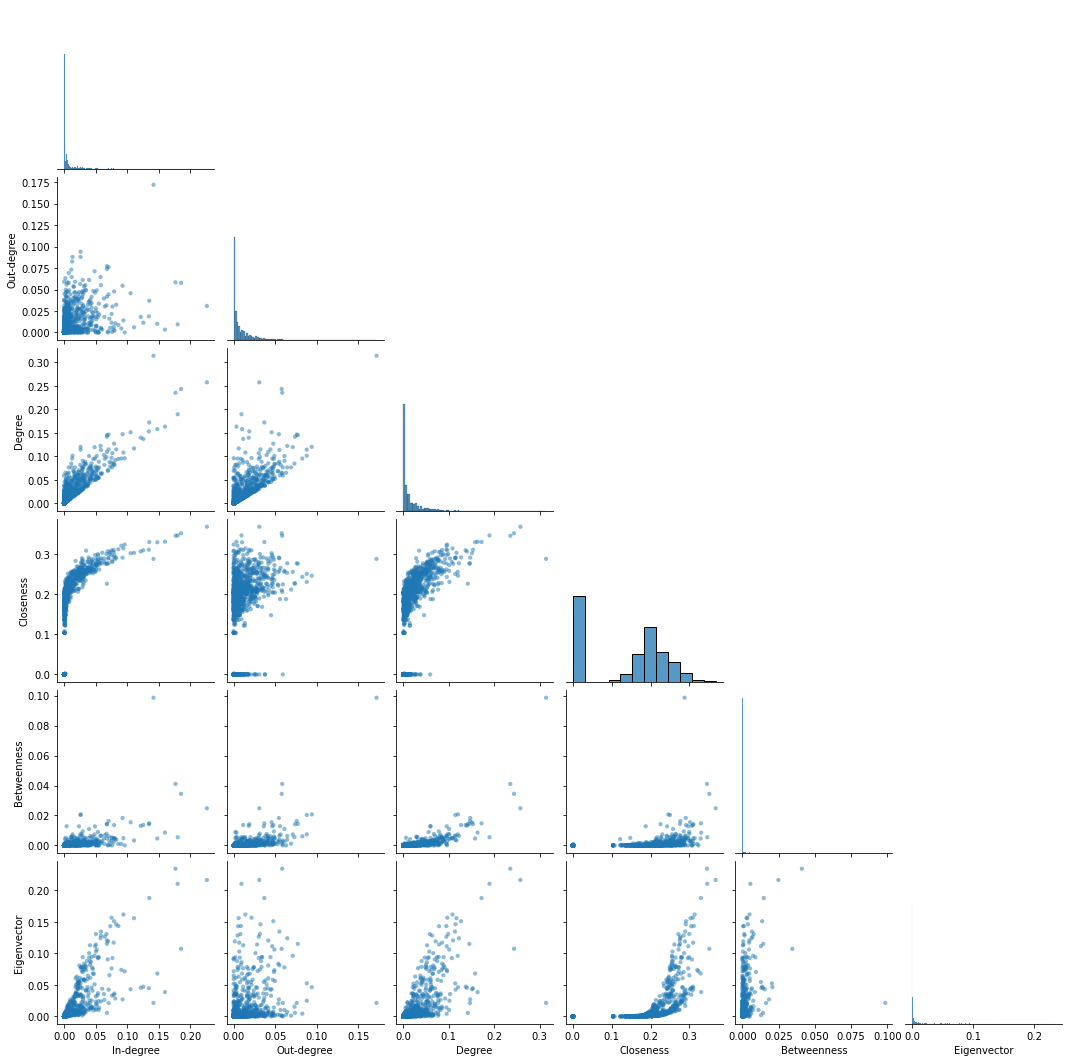

In [20]:
sb.pairplot(
    data = polblogs_centrality_df,
    corner = True,
    plot_kws = {
        'marker':'o',
        'size': 5,
        'linewidth': 0,
        'alpha': .5
    }
)

Many of these values are strongly skewed (see distributions along the diagonal). Apply a log-transform to attempt to make them more normally-distributed and inspect the pairplot.

In [21]:
polblogs_centrality_df.apply(lambda x:np.log(x)).replace({-np.inf:0})

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,In-degree,Out-degree,Degree,Closeness,Betweenness,Eigenvector
liberaloasis.com,-2.690740,-2.560928,-1.930582,-1.287941,-4.244519,-2.162526
hugozoom.blogspot.com,-5.696422,-6.612713,-5.359950,-1.608280,-13.359008,-5.206022
wholewheatblogger.com,-7.305860,-4.472647,-4.415488,-1.827720,-9.491745,-10.456000
drudgereport.com,-1.833589,-5.696422,-1.812799,-1.107263,-4.761188,-3.255116
markarkleiman.com,-3.228323,-3.642298,-2.720893,-1.250020,-6.195197,-2.299018
...,...,...,...,...,...,...
vondollens.us,0.000000,0.000000,0.000000,0.000000,0.000000,-121.078495
vote4georgew.blogspot.com,0.000000,0.000000,0.000000,0.000000,0.000000,-121.078495
wanderingmind.blog-city.com,0.000000,0.000000,0.000000,0.000000,0.000000,-121.078495
wrighthot.com,0.000000,0.000000,0.000000,0.000000,0.000000,-121.078495


C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


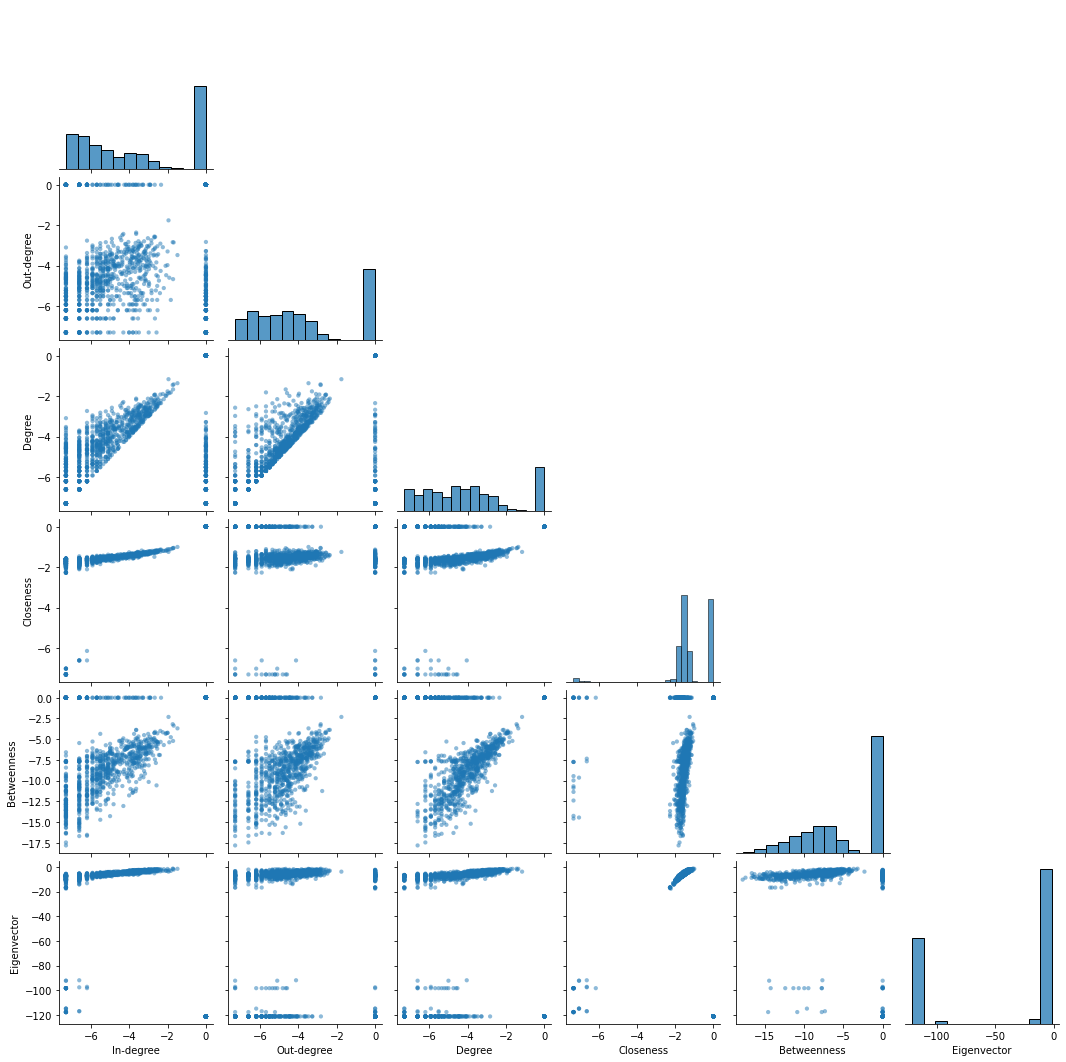

In [22]:
polblogs_centrality_log_df = polblogs_centrality_df.apply(lambda x:np.log(x)).replace({-np.inf:0})

sb.pairplot(
    data = polblogs_centrality_log_df,
    corner = True,
    plot_kws = {
        'marker':'o',
        'size': 5,
        'linewidth': 0,
        'alpha': .5
    }
)

#### Exercise
Make a pairplot of the different centralities measures in `boulder_g`.